In [1]:
import torchvision.datasets as dataset
import torchvision.transforms as transform

In [2]:
class Compose(object):
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, image, target):
        for t in self.transforms:
            image = t(image)
            target = t(target)
        return image, target

train_dataset = dataset.Cityscapes('/datasets/cityscapes/',split='test', mode='fine',
                     target_type='semantic',transforms=Compose([transform.ToTensor()]))

In [13]:
pic = train_dataset[200][0]
label = train_dataset[200][1]

In [14]:
print(pic.size())
print(label.size())

torch.Size([3, 1024, 2048])
torch.Size([1, 1024, 2048])


In [15]:
import torch
import numpy
import matplotlib.pyplot as plt

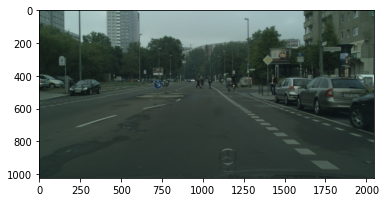

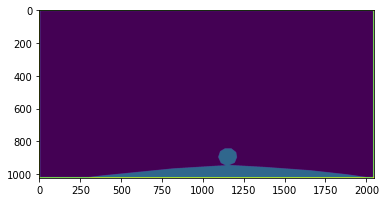

tensor([[[3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3],
         ...,
         [3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3],
         [3, 3, 3,  ..., 3, 3, 3]]], dtype=torch.int32)


In [16]:
plt.imshow(numpy.transpose(pic.numpy(),[1,2,0]))
plt.show()
plt.imshow(numpy.transpose(label.numpy(),[1,2,0]))
plt.show()
print((label*256).int())

In [7]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=12, shuffle=True, num_workers=2)

In [8]:
img, labels = next(iter(train_dataloader))

In [9]:
img.shape

torch.Size([12, 3, 1024, 2048])

In [10]:
labels.shape

torch.Size([12, 1, 1024, 2048])

In [11]:
torch.max(labels)*256

tensor(3.0118)

In [12]:
torch.min(labels)

tensor(0.)